Imports the libraries and file we will use to implement linear regression problem.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import functions

CAR MULTIPLE LINEAR REGRESSION EXAMPLE

Uses Gradient Descent Algorithm to obtain the estimated mileage of each sample and then creates a table of observed mpg, estimated mpg, and error (absolute(observed - estimated)). Calculates R^2 and Adjusted R^2. R^2 = ~0.87 which suggests that the model fits the training data very well because the error is a relatively small proportion. Adjusted R^2 = ~0.82 which suggests that our current number of features provides a good estimation of the mpg and we probably do not need to add any more or take any away.

In [10]:
#creates feature DataFrame and target DataFrame
X = pd.read_csv('cars.csv')
X = X.drop(columns=['mpg'])
y = pd.read_csv('cars.csv', usecols=['mpg'])

#scales features using mean normalization
scaled_X = functions.mean_normalize(X)

#creates list of feature names
features = []
for feature in scaled_X.columns:
    features.append(feature)

#learns hypothesis using GDA with learning rate of 0.2, convergence constant as 0.00001, and initial parameters as 0
params = functions.gda_linear(scaled_X, y)

#creates DataFrame of observed mpg, estimated mpg, and the absolute error between them
observed_mpg = []
estimated_mpg = []
error = []
for i in range(len(scaled_X)):
    observed_mpg.append(y['mpg'][i])
    estimation = 0
    for j in range(len(params)):
        if j == 0:
            estimation += params[j]
        else:
            estimation += params[j] * scaled_X[features[j-1]][i]
    estimated_mpg.append(estimation)
    error.append(abs(observed_mpg[-1] - estimation))
    
mpg_df = pd.DataFrame({"Observed MPG" : observed_mpg, "Estimated MPG" : estimated_mpg, "Error" : error})
display(mpg_df)

#calculates R^2 and Adjusted R^2
SS_res = 0
y_bar = 0
for i in range(len(X)):
    SS_res += (mpg_df['Error'][i])**2
    y_bar += mpg_df['Observed MPG'][i] / len(X)
SS_tot = 0
for observation in y['mpg']:
    SS_tot += (observation - y_bar)**2
r_squared = 1 - (SS_res/SS_tot)
adjusted_r_squared = 1 - (1-r_squared) * ((len(X) - 1) / (len(X) - len(features)))
print('R\u00b2: ', r_squared)
print('Adjusted R\u00b2: ', adjusted_r_squared)

,Observed MPG,Estimated MPG,Error
0,21.0,22.599007,1.599007
1,21.0,22.111668,1.111668
2,22.8,26.251199,3.451199
3,21.4,21.236896,0.163104
4,18.7,17.692881,1.007119
5,18.1,20.383142,2.283142
6,14.3,14.385661,0.085661
7,24.4,22.495917,1.904083
8,22.8,24.418690,1.618690
9,19.2,18.699410,0.500590


R²:  0.8690157581681466
Adjusted R²:  0.8154312956005701


Uses a leave-one-out cross-validation (LOOCV) scheme for learning a multiple linear regression hypothesis using all mean normalized features to calculate the estimated mileage and reports information in a table. Calculates cross-validation R^2 and Adjusted R^2. R^2 is somewhat low suggesting that the model poorly predicts future data and has a high degree of residual variance. Adjusted R^2 is even lower suggesting that the features we used are not very valuable in predicting an unseen sample.

In [11]:
observed_mpg = []
estimated_mpg = []
errors = []
for i in range(len(X)):
    new_X = scaled_X.drop(i)
    new_y = y.drop(i)
    params = functions.normal_equations(new_X, new_y)
    observed_mpg.append(y['mpg'][i])
    estimate = 0
    for j in range(len(params)):
        if j == 0:
            estimate += params[j]
        else:
            estimate += params[j] * scaled_X[features[j-1]][i]
    estimated_mpg.append(estimate[0])
    errors.append(abs(observed_mpg[i] - estimated_mpg[i]))
mpg_df = pd.DataFrame({'Observed MPG' : observed_mpg, 'Estimated MPG' : estimated_mpg, 'Error' : errors})
display(mpg_df)

#calculates R^2 and Adjusted R^2
SS_res = 0
y_bar = 0
for i in range(len(X)):
    SS_res += (mpg_df['Error'][i])**2
    y_bar += mpg_df['Observed MPG'][i] / len(X)
SS_tot = 0
for observation in y['mpg']:
    SS_tot += (observation - y_bar)**2
r_squared = 1 - (SS_res/SS_tot)
adjusted_r_squared = 1 - (1-r_squared) * ((len(X) - 1) / (len(X) - len(features)))
print('Cross-validation R\u00b2: ', r_squared)
print('Cross-validation Adjusted R\u00b2: ', adjusted_r_squared)

,Observed MPG,Estimated MPG,Error
0,21.0,23.293220,2.293220
1,21.0,22.566524,1.566524
2,22.8,27.333265,4.533265
3,21.4,21.189455,0.210545
4,18.7,17.442560,1.257440
5,18.1,21.280979,3.180979
6,14.3,14.427961,0.127961
7,24.4,21.557246,2.842754
8,22.8,29.082530,6.282530
9,19.2,18.322143,0.877857


Cross-validation R²:  0.653824581644485
Cross-validation Adjusted R²:  0.5122073650445016


Learns 10 multiple linear regression hypotheses using matrices with the first k = 1,..,10 normalized features and calculates R^2 and Adjusted R^2 for each hypothesis, then plots the R^2 and Adjusted R^2 values as a function of the number of mean normalized features used to train the model. The plot shows that as we increase the number of features we use R^2 increases and begins to level off after using 5 features to train the model, whereas Adjusted R^2 goes up and dow, peaking at 5 and 8 features. The results for R^2 are not suprising because R^2 always increases as you add more features, even if they are utterly irrelevant. Adjusted R^2 peaks at 5 features after being susbstantially lower with 4 features suggests that the 5th feature added, scaled_wt, is very useful for approximating mpg. Adjusted R^2 peaks again at 8 features suggests the 8th feature, scaled_am, is also very useful. The dips associated with features 6, 7, 9, and 10 (qsec, vs, carb, and gear) suggest that these features do not significantly contribute to the accuracy of the model. If I were to train a model with alot of data and potential cost, I would strongly consider leaving out qsec, vs, carb, and carb.

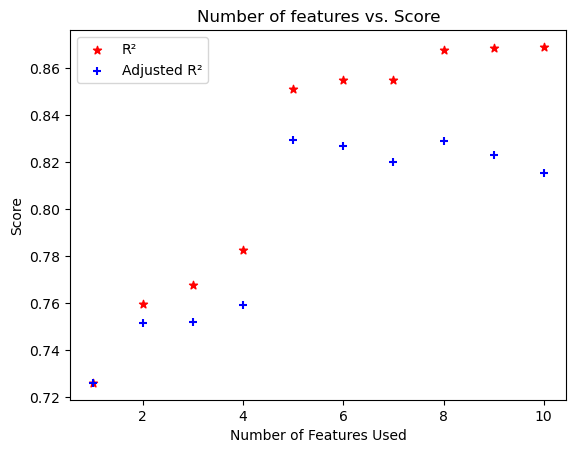

In [12]:
#creates DataFrames of first k = 1,..,10 mean normalized features
X_1 = scaled_X[['scaled_cyl']]
X_2 = scaled_X[['scaled_cyl', 'scaled_disp']]
X_3 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp']]
X_4 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat']]
X_5 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt']]
X_6 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt', 'scaled_qsec']]
X_7 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt', 'scaled_qsec', 'scaled_vs']]
X_8 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt', 'scaled_qsec', 'scaled_vs', 'scaled_am']]
X_9 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt', 'scaled_qsec', 'scaled_vs', 'scaled_am', 'scaled_gear']]
X_10 = scaled_X[['scaled_cyl', 'scaled_disp', 'scaled_hp', 'scaled_drat', 'scaled_wt', 'scaled_qsec', 'scaled_vs', 'scaled_am', 'scaled_gear', 'scaled_carb']]

#learns a multiple linear regression hypothesis for DataFrames above
params = []
params.append(functions.normal_equations(X_1, y))
params.append(functions.normal_equations(X_2, y))
params.append(functions.normal_equations(X_3, y))
params.append(functions.normal_equations(X_4, y))
params.append(functions.normal_equations(X_5, y))
params.append(functions.normal_equations(X_6, y))
params.append(functions.normal_equations(X_7, y))
params.append(functions.normal_equations(X_8, y))
params.append(functions.normal_equations(X_9, y))
params.append(functions.normal_equations(X_10, y))    
    
#calculates R^2 and Adjusted R^2 for each MLR hypothesis
r2_list = []
adjusted_r2_list = []
num_features = []
for i in range(10):
    SS_res = 0
    y_bar = 0
    SS_tot = 0
    for j in range(len(X)):
        estimate = 0
        for k in range(len(params[i])):
            if k == 0:
                estimate += params[i][k]
            else:
                estimate += params[i][k] * scaled_X[features[k-1]][j]
        SS_res += (y['mpg'][j] - estimate)**2
        y_bar += y['mpg'][j] / len(X)
    for j in range(len(y)):
        SS_tot += (y['mpg'][j] - y_bar)**2
    num_features.append(i + 1)
    r2 = 1 - (SS_res / SS_tot)
    r2_list.append(r2)
    adjusted_r2 = 1 - (1 - r2) * ((len(X) - 1) / (len(X) - (i + 1)))
    adjusted_r2_list.append(adjusted_r2)
                            
#plots R^2 and adjusted R^2
plt.scatter(num_features, r2_list, color='red', marker = '*')
plt.scatter(num_features, adjusted_r2_list, color = 'blue', marker = '+')
plt.xlabel('Number of Features Used')
plt.ylabel('Score')
plt.title('Number of features vs. Score')
plt.legend(['R\u00b2', 'Adjusted R\u00b2'])
plt.show()

CANCER LOGISTIC REGRESSION EXAMPLE

Learns a logistic regression hypothesis to calculate the probability of an individual who smokes having lung cancer.

In [13]:
#creates feature DataFrame and target DataFrame
X = pd.read_csv('cancer.csv', usecols=['Smoking'])
y = pd.read_csv('cancer.csv', usecols=['LungCancer'])

#learns hypothesis using GDA with learning rate of 0.2, convergence constant as 0.00001, and initial parameters as 0
params = functions.gda_logistic(X, y, False)

#calculates probabilities of LungCancer given smoking and given not smoking
print('Probability that an individual who smokes has lung cancer: ', \
      str(100 * (1 / (1 + math.exp(-(params[0] + params[1]))))) + '%')
print('Probability that an individual who smokes does not have lung cancer: ', \
      str(100 - 100 * (1 / (1 + math.exp(-(params[0] + params[1]))))) + '%')
print('Probability that an individual who does not smoke has lung cancer: ', \
      str(100 * (1 / (1 + math.exp(-params[0])))) + '%')
print('Probability that an individual who does not smoke does not have lung cancer: ', \
      str(100 - 100 * (1 / (1 + math.exp(-params[0])))) + '%')

Probability that an individual who smokes has lung cancer:  59.990636166200375%
Probability that an individual who smokes does not have lung cancer:  40.009363833799625%
Probability that an individual who does not smoke has lung cancer:  44.4614970890725%
Probability that an individual who does not smoke does not have lung cancer:  55.5385029109275%


Classifies each individual as having lung cancer or not having lung cancer and creates the confusion matrix, then reports the percentage of correct classifications, precision, recall, specificity, and F1 score. The results indicate that the classification model is only somewhat accurate, producing the current classification ~58% of the time. The precision is slightly better at 0.6, meaning that the model is somewhat likely to produce false positives. The recall is also 0.6, meaning that the false negatives are also somewhat likely to occur. The specificity is marginally lower at ~0.56, meaning the model is not great at predicting negative outcomes as such, an okay result given that we would rather have a false positive than a false negative. The F1 score is 0.6 which indicates the model is okay overall at producing the correct classification in this data set.

In [14]:
#creates confusion matrix
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for i in range(len(X)):
    probability = 1 / (1 + math.exp(-(params[0] + params[1] * X['Smoking'][i])))
    if probability > 0.5:
        if y['LungCancer'][i] == 1:
            true_pos += 1
        else:
            false_pos += 1
    else:
        if y['LungCancer'][i] == 0:
            true_neg += 1
        else:
            false_neg += 1
confusion_matrix = pd.DataFrame({'ObservedLungCancer':[true_pos, false_neg],'ObservedNoLungCancer':[false_pos, true_neg]}, \
                                index=['PredictedLungCancer', 'PredicedNoLungCancer'])

display(confusion_matrix)
print('Percentage of correctly classified samples: ', str(100 * (true_pos + true_neg) / len(X)) + '%')
print('Precision: ', (true_pos / (true_pos + false_pos)))
print('Recall: ', (true_pos / (true_pos + false_neg)))
print('Specificity: ', (true_neg / (true_neg + false_pos)))
print('F\u2081 score: ', (2 / (((true_pos + false_pos) / true_pos) + ((true_pos + false_neg) / true_pos))))

,ObservedLungCancer,ObservedNoLungCancer
PredictedLungCancer,6,4
PredicedNoLungCancer,4,5


Percentage of correctly classified samples:  57.89473684210526%
Precision:  0.6
Recall:  0.6
Specificity:  0.5555555555555556
F₁ score:  0.6


Calculates how much more likely a smoker is to have lung cancer over a non-smoker using the odds ratio (OR).

In [7]:
#calculates how much more likely a smoker is to have lung cancer over a non-smoker
print('A smoker is', str(100 * (math.exp(params[0] + params[1]) - 1)) + '% more likely to have lung cancer than a non-smoker.')

A smoker is 49.94148973576207% more likely to have lung cancer than a non-smoker.


EMAIL SPAM LOGSTIC REGRESSION EXAMPLE

Creates a graph of the suspicious word count vs. subject length. It is evident that as the amount of suspicious words and the length of the subject increase, the probability that an email is spam increases.

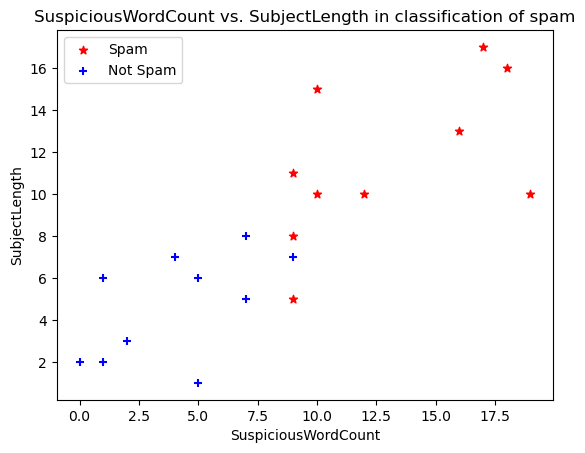

In [8]:
#creates feature DataFrame and target DataFrame
X = pd.read_csv('emails.csv', usecols=['SubjectLength', 'SuspiciousWordCount'])
y = pd.read_csv('emails.csv', usecols=['SpamFlag'])

#makes a plot of the samples 
spam_x = []
spam_y = []
notSpam_x = []
notSpam_y = []
for i in range(len(X)):
    if y['SpamFlag'][i] == 1:
        spam_x.append(X['SuspiciousWordCount'][i])
        spam_y.append(X['SubjectLength'][i])
    else:
        notSpam_x.append(X['SuspiciousWordCount'][i])
        notSpam_y.append(X['SubjectLength'][i])
plt.scatter(spam_x, spam_y, color='red', marker='*')
plt.scatter(notSpam_x, notSpam_y, color='blue', marker='+')
plt.xlabel('SuspiciousWordCount')
plt.ylabel('SubjectLength')
plt.title('SuspiciousWordCount vs. SubjectLength in classification of spam')
plt.legend(['Spam', 'Not Spam'])
plt.show()

Learns a logistic regression hypothesis to determine the probability than an email is spam as a function of the number of suspicious words and the length of the subject.

In [9]:
params = functions.gda_logistic(X, y, False)
print('Probability that an email is spam is given by:\n 1 / 1 + e^-(' + str(params[0]), '+', params[1], '* x\u2081(SubjectLength) +', params[2], '* x\u2082(SuspiciousWordCount))')

Probability that an email is spam is given by:
 1 / 1 + e^-(-35.686189482558305 + 0.23549743445437257 * x₁(SubjectLength) + 3.8921610733282175 * x₂(SuspiciousWordCount))


Overlays function learned from Gradient Descent Algorithm on the scatter plot of SuspiciousWordCount vs. SubjectLength. The decision boundary seperates the non-spam from the spam with 90% accuracy, only misidentifying two spam emails as non-spam. This is a good decision boundary because it does not accidentally classify non-spam emails as spam which would be bad because they could be important and it is highly accurate.

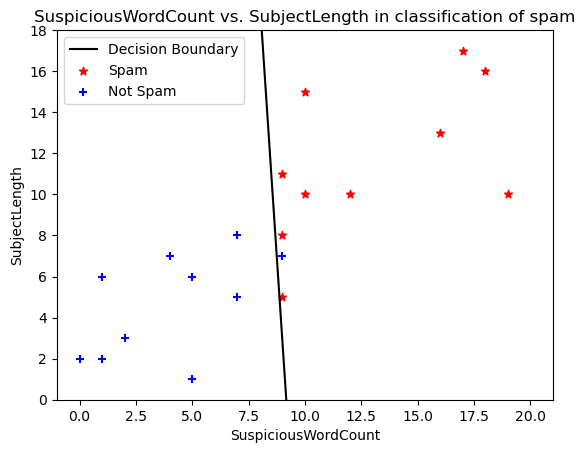

In [10]:
sus_words = np.linspace(0, 20, 100)
sub_len = (params[0] + params[2] * sus_words) / (-1 * params[1])
plt.plot(sus_words, sub_len, '-k', label='Decision Boundary')
plt.scatter(spam_x, spam_y, color='red', marker='*')
plt.scatter(notSpam_x, notSpam_y, color='blue', marker='+')
plt.xlabel('SuspiciousWordCount')
plt.ylabel('SubjectLength')
plt.title('SuspiciousWordCount vs. SubjectLength in classification of spam')
plt.legend(['Decision Boundary', 'Spam', 'Not Spam'])
plt.ylim(0, 18)
plt.show()

Classifies each sample as being spam or not being spam and creates the confusion matrix, then reports the percentage of correct classifications, precision, recall, specificity, and F1 score. The results indicate that the classification model is very accurate, producing the current classification 95% of the time. The precision is ~0.91, meaning that the model is good at predicting positive (spam) outcomes as such and produces few false positives. The recall is 1 meaning that the it always correctly identifed spam as spam and never falsely identified it as not spam. The specificity is 0.9, meaning the model is somewhat good at predicting negative outcomes as such, but it occasionally produces a false positive. The F1 score is ~0.95 which indicates the model is very good overall at producing the correct classification in this data set.

In [11]:
#creates confusion matrix
true_pos = 0
false_pos = 0
true_neg = 0
false_neg = 0
for i in range(len(X)):
    probability = 1/(1 + math.exp(-(params[0] + params[1] * X['SubjectLength'][i] + params[2] * X['SuspiciousWordCount'][i])))
    if probability > 0.5:
        if y['SpamFlag'][i] == 1:
            true_pos += 1
        else:
            false_pos += 1
    else:
        if y['SpamFlag'][i] == 0:
            true_neg += 1
        else:
            false_neg += 1
            
confusion_matrix = pd.DataFrame({'ObservedSpam':[true_pos, false_neg],'ObservedNotSpam':[false_pos, true_neg]}, \
                                index=['PredictedSpam', 'PredicedNotSpam'])

display(confusion_matrix)
print('Percentage of correctly classified samples: ', str(100 * (true_pos + true_neg) / len(X)) + '%')
print('Precision: ', (true_pos / (true_pos + false_pos)))
print('Recall: ', (true_pos / (true_pos + false_neg)))
print('Specificity: ', (true_neg / (true_neg + false_pos)))
print('F\u2081 score: ', (2 / (((true_pos + false_pos) / true_pos) + ((true_pos + false_neg) / true_pos))))

,ObservedSpam,ObservedNotSpam
PredictedSpam,10,1
PredicedNotSpam,0,9


Percentage of correctly classified samples:  95.0%
Precision:  0.9090909090909091
Recall:  1.0
Specificity:  0.9
F₁ score:  0.9523809523809523


FLOWER SPECIES MULTI-CLASS CLASSIFICATION EXAMPLE

Splits data into training and testing set with 80% of the data for each species of flower in the training set and the remaining 20% in the testing set.

In [12]:
X_total = pd.read_csv('flowers.csv', usecols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
y_total = pd.read_csv('flowers.csv', usecols=['Species'])
training_rows = []
testing_rows = []
new_training_rows = []
new_testing_rows = []
for i in range(len(X_total)):
    if (i < 40) or (i > 49 and i < 90) or (i > 99 and i < 140):
        training_rows.append(i)
    else:
        testing_rows.append(i)
    if i < 30:
        new_testing_rows.append(i)
    if i < 120:
        new_training_rows.append(i)
        
X_training = X_total.iloc[training_rows]
y_training = y_total.iloc[training_rows]
X_testing = X_total.iloc[testing_rows]
y_testing = y_total.iloc[testing_rows]
X_training.index = new_training_rows
y_training.index = new_training_rows
X_testing.index = new_testing_rows
y_testing.index = new_testing_rows

Scales training data using mean normalization and then scales the testing data using mean normalization with the mean and variance of the training data.

In [13]:
#scales X_testing using the mean and population variance of X_training
scaled_data = {}
for feature in X_training.columns:
    mean = 0
    for data in X_training[feature]:
        mean += data / len(X_training)
    
    pop_variance = 0
    for data in X_training[feature]:
        pop_variance += ((data - mean)**2) / len(X_training)
    
    feature_vector = []
    for data in X_testing[feature]:
        feature_vector.append((data - mean) / (pop_variance)**(0.5))
        
    scaled_data['scaled_' + feature] = feature_vector
X_testing = pd.DataFrame(scaled_data)
#scales X_training using mean normalization
X_training = functions.mean_normalize(X_training)

Learns 3 logistic regression hypotheses to determine the probability of each sample being a Setosa, Versicolor, and Virgincia.

In [14]:
params = functions.gda_logistic(X_training, y_training, True)
print('Probability that a flower is a Setosa is given by:\n 1 / 1 + e^-(' + str(params['setosa'][0]), '+', params['setosa'][1], '* x\u2081(SepalLength) +', params['setosa'][2], '* x\u2082(SepalWidth) +', params['setosa'][3], '* x\u2083(PetalLength) +', params['setosa'][4], '* x\u2084(PetalWidth))')
print('Probability that a flower is a Versicolor is given by:\n 1 / 1 + e^-(' + str(params['versicolor'][0]), '+', params['versicolor'][1], '* x\u2081(SepalLength) +', params['versicolor'][2], '* x\u2082(SepalWidth) +', params['versicolor'][3], '* x\u2083(PetalLength) +', params['versicolor'][4], '* x\u2084(PetalWidth))')
print('Probability that a flower is a Virginica is given by:\n 1 / 1 + e^-(' + str(params['virginica'][0]), '+', params['virginica'][1], '* x\u2081(SepalLength) +', params['virginica'][2], '* x\u2082(SepalWidth) +', params['virginica'][3], '* x\u2083(PetalLength) +', params['virginica'][4], '* x\u2084(PetalWidth))')

Probability that a flower is a Setosa is given by:
 1 / 1 + e^-(-5.242668929248029 + -1.749247564411033 * x₁(SepalLength) + 3.9783371063336603 * x₂(SepalWidth) + -4.4133083625155916 * x₃(PetalLength) + -4.444897517941466 * x₄(PetalWidth))
Probability that a flower is a Versicolor is given by:
 1 / 1 + e^-(-0.9486160001597899 + 0.2704711045422724 * x₁(SepalLength) + -1.3802546239919469 * x₂(SepalWidth) + 0.615458720637462 * x₃(PetalLength) + -0.8909152693355074 * x₄(PetalWidth))
Probability that a flower is a Virginica is given by:
 1 / 1 + e^-(-18.709921530578466 + -1.9875476547204105 * x₁(SepalLength) + -2.7721496824786143 * x₂(SepalWidth) + 15.735421881296492 * x₃(PetalLength) + 12.866638807973812 * x₄(PetalWidth))


Using the probabilities learned previously, I classify each flower in the training data into one of the three species
categories and report the classification matrix, overall, and species-wise percentage of correct classification.
The results indicate that the classification model is very accurate, producing the current classification 97.5% of the time. The Setosa class accuracy is 100% meaning that the model correctly identified the Setosa species all the time. The Versicolor class accuracy is 95% meaning that the model only misidentified 5% of the Versicolor species as a different species, specifically Virginica. The Virginica class accuracy is 97.5% meaning that the model only misidentified 2.5% of the Virginica species as different species, specifically Versicolor.

In [15]:
features = []
for feature in X_training.columns:
    features.append(feature)
true_set = 0
o_set_p_ver = 0
o_set_p_vir = 0
true_ver = 0
o_ver_p_set = 0
o_ver_p_vir = 0
true_vir = 0
o_vir_p_set = 0
o_vir_p_ver = 0

for i in range(len(X_training)):
    probs = {}
    for c in params:
        prob = params[c][0]
        for j in range(len(params[c]) - 1):
            prob += params[c][j+1] * X_training[features[j]][i]
        prob = 1 / (1 + math.exp(-prob))
        probs[c] = prob
    if y_training['Species'][i] == 'setosa':
        if probs['setosa'] > probs['versicolor'] and probs['setosa'] > probs['virginica']:
            true_set += 1
        elif probs['versicolor'] > probs['setosa'] and probs['versicolor'] > probs['virginica']:
            o_set_p_ver += 1
        else:
            o_set_p_vir += 1
    elif y_training['Species'][i] == 'versicolor':
        if probs['versicolor'] > probs['setosa'] and probs['versicolor'] > probs['virginica']:
            true_ver += 1
        elif probs['setosa'] > probs['versicolor'] and probs['setosa'] > probs['virginica']:
            o_ver_p_set += 1
        else:
            o_ver_p_vir += 1
    else:
        if probs['virginica'] > probs['setosa'] and probs['virginica'] > probs['versicolor']:
            true_vir += 1
        elif probs['setosa'] > probs['virginica'] and probs['setosa'] > probs['versicolor']:
            o_vir_p_set += 1
        else:
            o_vir_p_ver += 1
data = {}
data['Observed Setosa'] = [true_set, o_set_p_ver, o_set_p_vir]
data['Observed Versicolor'] = [o_ver_p_set, true_ver, o_ver_p_vir]
data['Observed Virginica'] = [o_vir_p_set, o_vir_p_ver, true_vir]
class_matrix = pd.DataFrame(data, index=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'])
display(class_matrix)
print('Overall accuracy: ', str(100 * (true_set+true_ver+true_vir) / len(X_training)) + '%')
print('Setosa class accuracy: ', str(100 * true_set / (true_set + o_set_p_ver + o_set_p_vir)) + '%')
print('Versicolor class accuracy: ', str(100 * true_ver / (true_ver + o_ver_p_set + o_ver_p_vir)) + '%')
print('Virginica class accuracy: ', str(100 * true_vir / (true_vir + o_vir_p_set + o_vir_p_ver)) + '%')

,Observed Setosa,Observed Versicolor,Observed Virginica
Predicted Setosa,40,0,0
Predicted Versicolor,0,38,1
Predicted Virginica,0,2,39


Overall accuracy:  97.5%
Setosa class accuracy:  100.0%
Versicolor class accuracy:  95.0%
Virginica class accuracy:  97.5%


Using the probabilities learned previously, I classify each flower in the test data into one of the three species
categories and report the classification matrix, overall, and species-wise percentage of correct classification.
The results indicate that the classification model is very accurate, producing the current classification 100% of the time on the as-of-yet-unseen testing data. The Setosa, Versicolor, and Virginica class accuracies are 100% meaning that the model correctly identified the species of each sample 100% of the time.

In [16]:
true_set = 0
o_set_p_ver = 0
o_set_p_vir = 0
true_ver = 0
o_ver_p_set = 0
o_ver_p_vir = 0
true_vir = 0
o_vir_p_set = 0
o_vir_p_ver = 0

for i in range(len(X_testing)):
    probs = {}
    for c in params:
        prob = params[c][0]
        for j in range(len(params[c]) - 1):
            prob += params[c][j+1] * X_testing[features[j]][i]
        prob = 1 / (1 + math.exp(-prob))
        probs[c] = prob
    if y_testing['Species'][i] == 'setosa':
        if probs['setosa'] > probs['versicolor'] and probs['setosa'] > probs['virginica']:
            true_set += 1
        elif probs['versicolor'] > probs['setosa'] and probs['versicolor'] > probs['virginica']:
            o_set_p_ver += 1
        else:
            o_set_p_vir += 1
    elif y_testing['Species'][i] == 'versicolor':
        if probs['versicolor'] > probs['setosa'] and probs['versicolor'] > probs['virginica']:
            true_ver += 1
        elif probs['setosa'] > probs['versicolor'] and probs['setosa'] > probs['virginica']:
            o_ver_p_set += 1
        else:
            o_ver_p_vir += 1
    else:
        if probs['virginica'] > probs['setosa'] and probs['virginica'] > probs['versicolor']:
            true_vir += 1
        elif probs['setosa'] > probs['virginica'] and probs['setosa'] > probs['versicolor']:
            o_vir_p_set += 1
        else:
            o_vir_p_ver += 1
data = {}
data['Observed Setosa'] = [true_set, o_set_p_ver, o_set_p_vir]
data['Observed Versicolor'] = [o_ver_p_set, true_ver, o_ver_p_vir]
data['Observed Virginica'] = [o_vir_p_set, o_vir_p_ver, true_vir]
class_matrix = pd.DataFrame(data, index=['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica'])
display(class_matrix)
print('Overall accuracy: ', str(100 * (true_set+true_ver+true_vir) / len(X_testing)) + '%')
print('Setosa class accuracy: ', str(100 * true_set / (true_set + o_set_p_ver + o_set_p_vir)) + '%')
print('Versicolor class accuracy: ', str(100 * true_ver / (true_ver + o_ver_p_set + o_ver_p_vir)) + '%')
print('Virginica class accuracy: ', str(100 * true_vir / (true_vir + o_vir_p_set + o_vir_p_ver)) + '%')

,Observed Setosa,Observed Versicolor,Observed Virginica
Predicted Setosa,10,0,0
Predicted Versicolor,0,10,0
Predicted Virginica,0,0,10


Overall accuracy:  100.0%
Setosa class accuracy:  100.0%
Versicolor class accuracy:  100.0%
Virginica class accuracy:  100.0%


Uses mean normalized data from spam data to learn a logistic regression hypothesis as a function of speal length, sepal width, and petal length. Plots three 3-dimensional graphs each containing the data for sepal length, sepal width, and petal length, and then overlaying the decision boundary for the three respective species in each.

Probability that a flower is a Setosa is given by:
 1 / 1 + e^-(-6.074751844792247 + -3.1352457239596734 * x₁(SepalLength) + 4.410360677053414 * x₂(SepalWidth) + -8.022001530918356 * x₃(PetalLength))
Probability that a flower is a Versicolor is given by:
 1 / 1 + e^-(-0.9455338634173045 + 0.5155250888872179 * x₁(SepalLength) + -1.5142401318642453 * x₂(SepalWidth) + -0.5116448198206993 * x₃(PetalLength))
Probability that a flower is a Virginica is given by:
 1 / 1 + e^-(-11.495969621918661 + -3.418914852625617 * x₁(SepalLength) + -0.2906923295630636 * x₂(SepalWidth) + 20.623500990626567 * x₃(PetalLength))


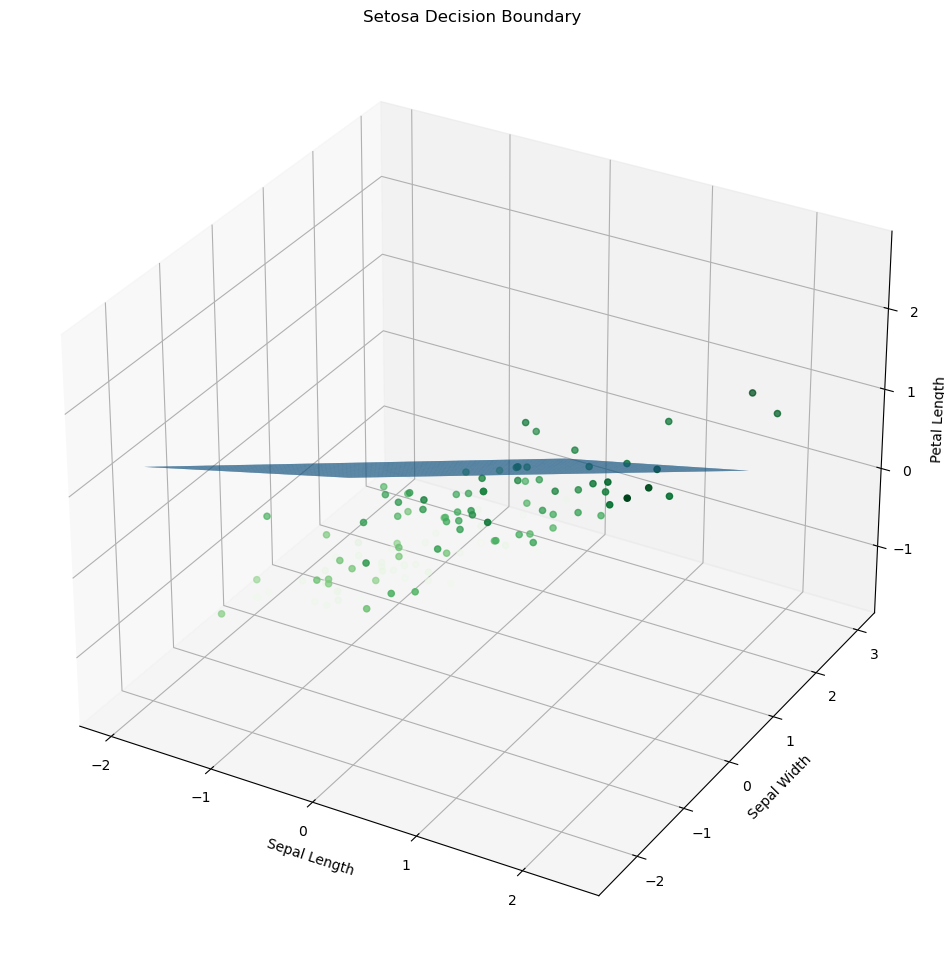

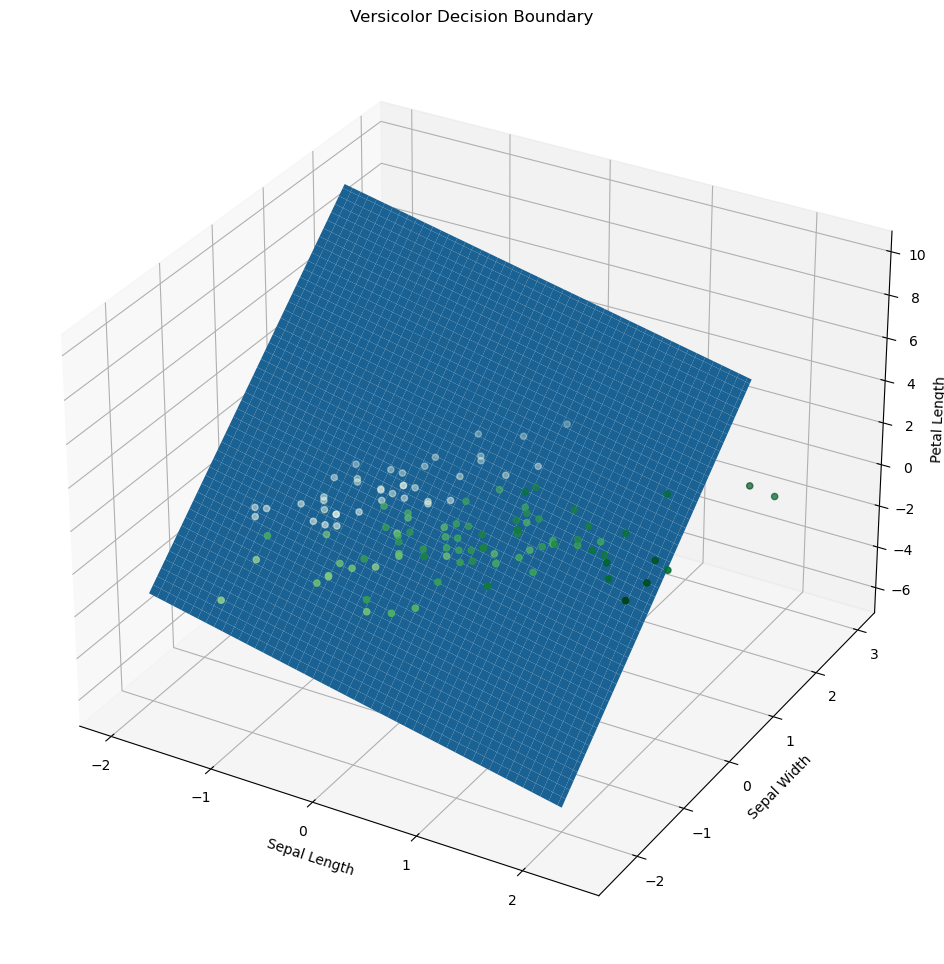

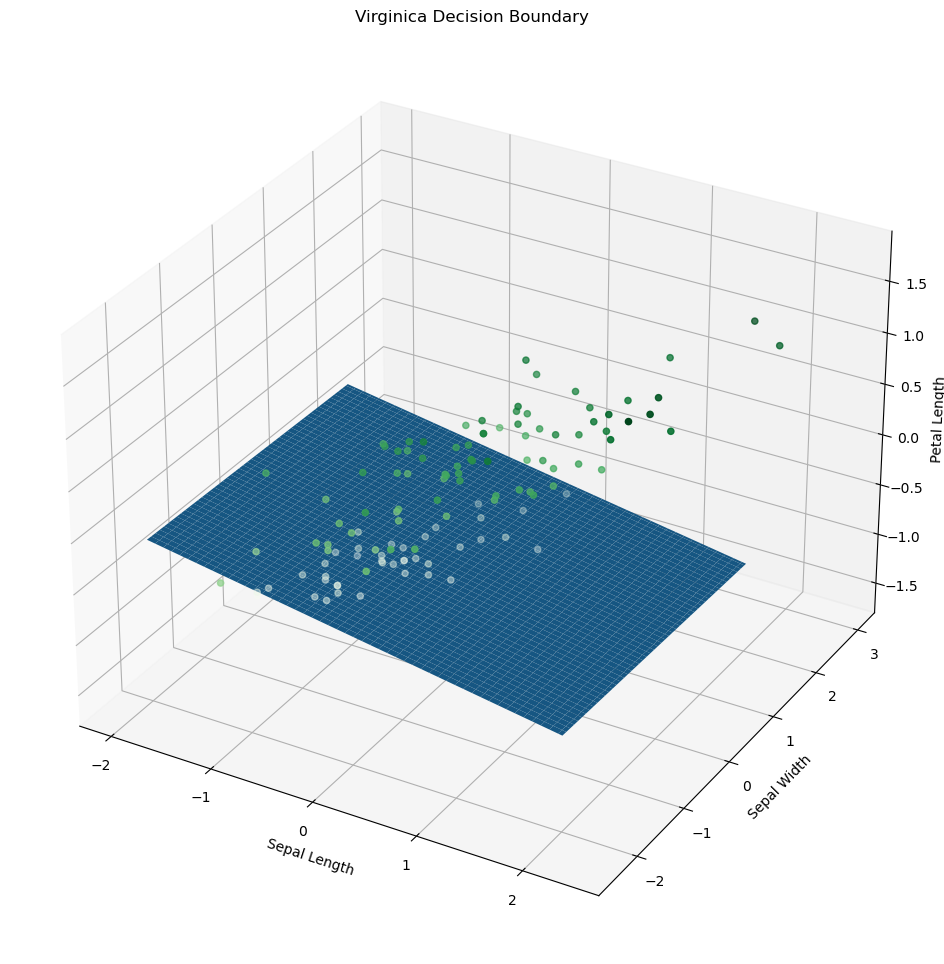

In [17]:
#learns hypothesis
X_training = X_training[['scaled_SepalLength', 'scaled_SepalWidth', 'scaled_PetalLength']]
params = functions.gda_logistic(X_training, y_training, True)
print('Probability that a flower is a Setosa is given by:\n 1 / 1 + e^-(' + str(params['setosa'][0]), '+', params['setosa'][1], '* x\u2081(SepalLength) +', params['setosa'][2], '* x\u2082(SepalWidth) +', params['setosa'][3], '* x\u2083(PetalLength))')
print('Probability that a flower is a Versicolor is given by:\n 1 / 1 + e^-(' + str(params['versicolor'][0]), '+', params['versicolor'][1], '* x\u2081(SepalLength) +', params['versicolor'][2], '* x\u2082(SepalWidth) +', params['versicolor'][3], '* x\u2083(PetalLength))')
print('Probability that a flower is a Virginica is given by:\n 1 / 1 + e^-(' + str(params['virginica'][0]), '+', params['virginica'][1], '* x\u2081(SepalLength) +', params['virginica'][2], '* x\u2082(SepalWidth) +', params['virginica'][3], '* x\u2083(PetalLength))')

#plots decision boundary for Setosa species
fig = plt.figure(figsize = [20, 12])
ax = plt.axes(projection='3d')
xdata = X_training['scaled_SepalLength']
ydata = X_training['scaled_SepalWidth']
zdata = X_training['scaled_PetalLength']
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
xx = np.linspace(-2, 2, 100)
yy = xx.copy().T
xx, yy = np.meshgrid(xx,yy)
zz = (params['setosa'][0] + (params['setosa'][1] * xx) + (params['setosa'][2] * yy)) / params['setosa'][3]
ax.plot_surface(xx, yy, zz)
plt.title('Setosa Decision Boundary')
plt.show()

#plots decision boundary for Versicolor
fig = plt.figure(figsize = [20, 12])
ax = plt.axes(projection='3d')
xdata = X_training['scaled_SepalLength']
ydata = X_training['scaled_SepalWidth']
zdata = X_training['scaled_PetalLength']
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
xx = np.linspace(-2, 2, 100)
yy = xx.copy().T
xx, yy = np.meshgrid(xx,yy)
zz = (params['versicolor'][0] + (params['versicolor'][1] * xx) + (params['versicolor'][2] * yy)) / params['versicolor'][3]
ax.plot_surface(xx, yy, zz)
plt.title('Versicolor Decision Boundary')
plt.show()

#plots decision boundary for virginica
fig = plt.figure(figsize = [20, 12])
ax = plt.axes(projection='3d')
xdata = X_training['scaled_SepalLength']
ydata = X_training['scaled_SepalWidth']
zdata = X_training['scaled_PetalLength']
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
xx = np.linspace(-2, 2, 100)
yy = xx.copy().T
xx, yy = np.meshgrid(xx,yy)
zz = (params['virginica'][0] + (params['virginica'][1] * xx) + (params['virginica'][2] * yy)) / params['virginica'][3]
ax.plot_surface(xx, yy, zz)
plt.title('Virginica Decision Boundary')
plt.show()